<a href="https://colab.research.google.com/github/devadathprabhu/DSC612/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Epoch 1/20
235/235 [==============================] - 4s 16ms/step - loss: 3.7981 - accuracy: 0.8283 - val_loss: 0.4060 - val_accuracy: 0.9160
Epoch 2/20
235/235 [==============================] - 3s 15ms/step - loss: 0.2648 - accuracy: 0.9330 - val_loss: 0.2377 - val_accuracy: 0.9345
Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1585 - accuracy: 0.9545 - val_loss: 0.1866 - val_accuracy: 0.9484
Epoch 4/20
235/235 [==============================] - 3s 15ms/step - loss: 0.1151 - accuracy: 0.9663 - val_loss: 0.1838 - val_accuracy: 0.9545
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0896 - accuracy: 0.9732 - val_loss: 0.1840 - val_accuracy: 0.9589
Epoch 6/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0750 - accuracy: 0.9768 - val_loss: 0.1441 

Text(0.5, 1.0, 'Accuracy Curves')

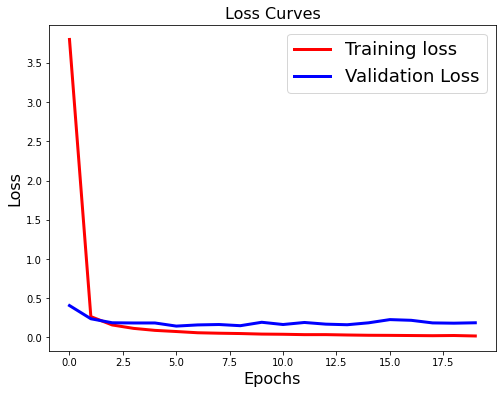

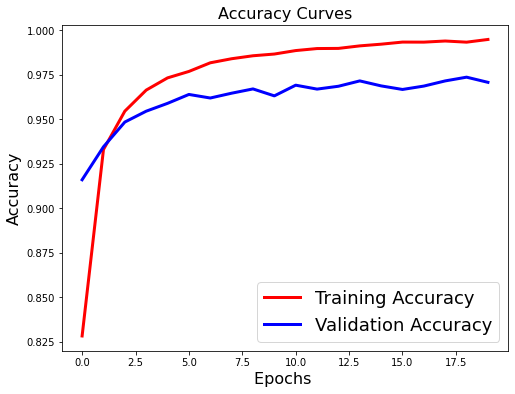

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(dim_data,))) #first hidden layer
model.add(Dense(256,activation='relu')) #second hidden layer
model.add(Dense(256,activation='relu')) #third hidden layer
model.add(Dense(classes_num, activation='softmax'))

sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.0)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256,
                    epochs=20, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'], 'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)